In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [3]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

Exploratory Data Analysis

importing the csv file which we have scraped the ratting and review details..

In [4]:
df = pd.read_csv("Rattings.csv")
df

,Rattings,Review
0,1,Very bad product only work in Laptop and most ...
1,1,"Volume control not working good, very poor sou..."
2,1,No value for money and received damaged
3,2,Speaker problem! If they fix it then it's one ...
4,1,Return my money
...,...,...
38693,5,Good signal coverage. Value for money. No firm...
38694,5,That's the most advanced Device...
38695,4,"I bought this router on Flipkart for ₹16,999 a..."
38696,5,Can't believe it took me this long to make the...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38698 entries, 0 to 38697
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  38698 non-null  int64 
 1   Review    38697 non-null  object
dtypes: int64(1), object(1)
memory usage: 604.8+ KB


In [6]:
df['length'] = df['Review'].str.len() #we are calculating length of each and every review before cleansing the data.
df

,Rattings,Review,length
0,1,Very bad product only work in Laptop and most ...,192.0
1,1,"Volume control not working good, very poor sou...",78.0
2,1,No value for money and received damaged,39.0
3,2,Speaker problem! If they fix it then it's one ...,77.0
4,1,Return my money,15.0
...,...,...,...
38693,5,Good signal coverage. Value for money. No firm...,58.0
38694,5,That's the most advanced Device...,34.0
38695,4,"I bought this router on Flipkart for ₹16,999 a...",1941.0
38696,5,Can't believe it took me this long to make the...,931.0


Data Cleansing.

In [7]:
# Convert all messages to lower case
df['Review'] = df['Review'].str.lower()

In [8]:
# Replace email addresses with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [9]:
# Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [10]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['Review'] = df['Review'].str.replace(r'£|\$', 'dollers')

In [11]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [12]:
# Replace numbers with 'numbr'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
df['Review']= df['Review'].astype(str)


In [14]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

In [15]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
lem=WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [17]:
df['clean_length'] = df.Review.str.len() # checking the length of the words post cleaning.
df.head()

,Rattings,Review,length,clean_length
0,1,bad product work laptop important thing time o...,192.0,135
1,1,"volume control working good, poor sound qualit...",78.0,61
2,1,value money received damaged,39.0,28
3,2,speaker problem! fix one good speaker low rate,77.0,46
4,1,return money,15.0,12


In [18]:
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 13766847.0
Clean Length 9916017


In [19]:
labels = df.Rattings
Text = df.Review
#reviews are cleaned 

Pre Processing

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary = True)
cv.fit(Text)
x = cv.transform(Text)

In [21]:
x

<38698x22778 sparse matrix of type '<class 'numpy.int64'>'
	with 1152428 stored elements in Compressed Sparse Row format>

In [22]:
y=labels

In [23]:
y

0        1
1        1
2        1
3        2
4        1
        ..
38693    5
38694    5
38695    4
38696    5
38697    3
Name: Rattings, Length: 38698, dtype: int64

PARAMETER TRAINING

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 85.27131782945736 found on randomstate 10


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

Selecting the Best model for Training

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [28]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    Scores = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return Scores

In [31]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes

In [32]:
models = [LogisticRegression(), GaussianNB(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42)]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting"]

In [33]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.8207281740413663 - (std: 0.004171812623463578)
Precision: 0.817087517772141 - (std: 0.004720085375848454)
Recall: 0.8207281740413663 - (std: 0.004171812623463578)
f1: 0.8136256078683297 - (std: 0.004073644481023576)


Step 2 of 7
....................................................................running Naive Bayes Gaussian
Accuracy: nan - (std: nan)
Precision: nan - (std: nan)
Recall: nan - (std: nan)
f1: nan - (std: nan)


Step 3 of 7
....................................................................running Random Forest
Accuracy: 0.8627985155029855 - (std: 0.0029868580518840134)
Precision: 0.8754645142983403 - (std: 0.0023587366830869765)
Recall: 0.8627985155029855 - (std: 0.0029868580518840134)
f1: 0.8571281217806769 - (std: 0.0033512448505101126)


Step 4 of 7
....................................................................running Decision Tree
Accuracy: 

In [34]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
2,Random Forest,0.862799,0.875465,0.862799,0.857128
3,Decision Tree,0.830996,0.828643,0.830996,0.828825
0,LogisticRegression,0.820728,0.817088,0.820728,0.813626
4,Extra Tree,0.814837,0.812786,0.814837,0.813222
6,Gradient Boosting,0.658994,0.702240,0.658994,0.600764
5,Ada Boost,0.592392,0.528839,0.592392,0.509411
1,Naive Bayes Gaussian,NaN,NaN,NaN,NaN


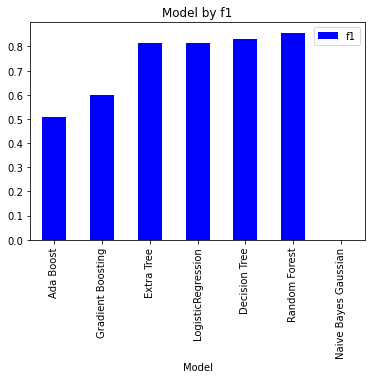

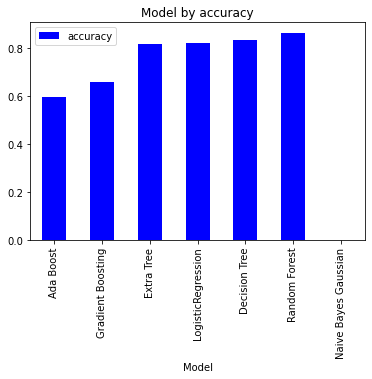

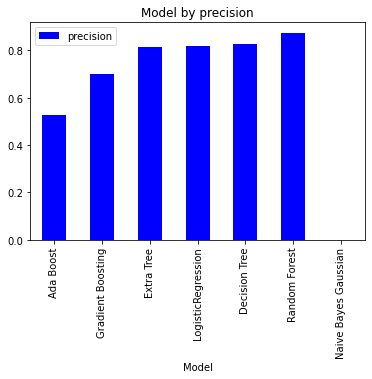

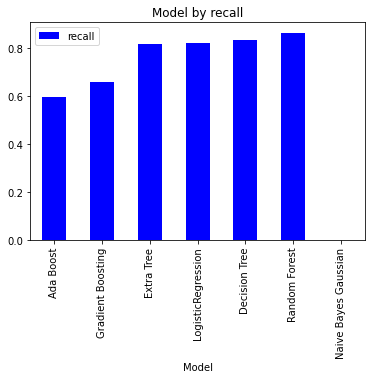

In [35]:
metrics_list = ["f1", "accuracy", "precision", "recall"]-

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'blue')
    plt.title(f"Model by {metric}")
    plt.show()

In [36]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [37]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[0.    , 0.    , 0.    , 0.    , 1.    ],
       [0.    , 0.    , 0.    , 0.    , 1.    ],
       [0.02  , 0.    , 0.    , 0.01  , 0.97  ],
       ...,
       [0.95  , 0.01  , 0.    , 0.01  , 0.03  ],
       [0.63  , 0.05  , 0.06  , 0.07  , 0.19  ],
       [0.21  , 0.04  , 0.0825, 0.2675, 0.4   ]])

In [39]:
fpr = {}
tpr = {}
thresh ={}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

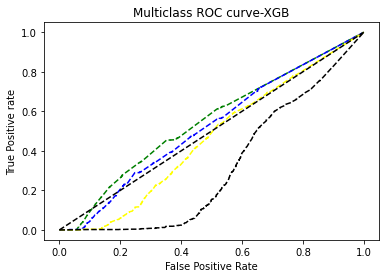

In [40]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [41]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [42]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,1,2,3,4,5
Real,,,,,
1,6935,9,14,23,456
2,309,1055,4,11,231
3,304,2,1548,31,579
4,214,3,10,3216,1395
5,238,3,12,134,12287


In [43]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           1       0.87      0.93      0.90      7437
           2       0.98      0.66      0.79      1610
           3       0.97      0.63      0.76      2464
           4       0.94      0.66      0.78      4838
           5       0.82      0.97      0.89     12674

    accuracy                           0.86     29023
   macro avg       0.92      0.77      0.82     29023
weighted avg       0.88      0.86      0.86     29023



HYPERPARAMETER TUNING

In [44]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4], }]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [45]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [ ]:
clf_random.fit(x_train, y_train)

Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 74.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 102.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 141.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 192.3min


In [ ]:
clf_random.best_params_

In [ ]:


clf_random.best_score_

In [ ]:
preds = cross_val_predict(clf_random.best_estimator_, x_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

In [ ]:
classifier_final_model = clf_random.best_estimator_
y_pred = classifier_final_model.predict(x_test)
 
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

In [ ]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
import joblib
joblib.dump(classifier_final_model,"Rattingprediction.obj")
